In [60]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.listdir(r'../data')

['.DS_Store', 'amazon_baby.csv', 'home_data.csv', 'Titanic']

In [3]:
train = pd.read_csv(r'../data/Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
test = pd.read_csv(r'../data/Titanic/test.csv')

9801

In [5]:
train.Age.mean()

29.69911764705882

In [6]:
test.Age.mean()

30.272590361445783

In [7]:
train.Age.median()

28.0

In [8]:
test.Age.median()

27.0

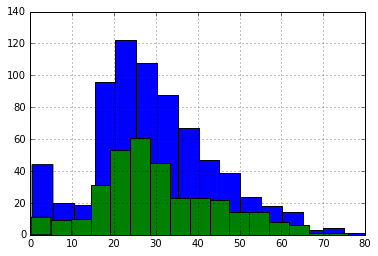

In [9]:
train.Age.hist(bins= 16)
test.Age.hist(bins= 16)

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train[train['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [12]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [13]:
train['Gender'] = train['Sex'].map(lambda x: x[0].upper())

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


In [15]:
train['Gender'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Gender'] = test['Sex'].map({'female':0, 'male':1}).astype(int)

In [16]:
train[train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [17]:
train['Port'] = train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
test['Port'] = test['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [18]:
train.loc[train['Embarked'].isnull() == True, 'Port'] = -99
test.loc[test['Embarked'].isnull() == True, 'Port'] = -99

In [19]:
train[train['Port'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,-99.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,-99.0


In [20]:
train[train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,-99.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,-99.0


In [21]:
train['Port'] = train['Port'].astype(int)
test['Port'] = test['Port'].astype(int)

In [22]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = train[(train['Gender'] == i) & 
                                 (train['Pclass'] == j+1)]['Age'].dropna().median()

In [24]:
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [25]:
train['AgeFill'] = train['Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,35.0


In [26]:
train[train['Age'].isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [27]:
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull()) & 
               (train.Gender == i) & 
               (train.Pclass == j+1), 'AgeFill'] = median_ages[i,j]

In [28]:
train[train['Age'].isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [29]:
test['AgeFill'] = test['Age']
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,2,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,3,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,2,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,3,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3,22.0


In [30]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [31]:
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = test[(test['Gender'] == i) & 
                                 (test['Pclass'] == j+1)]['Age'].dropna().median()

In [32]:
median_ages

array([[ 41.,  24.,  22.],
       [ 42.,  28.,  24.]])

In [33]:
for i in range(0,2):
    for j in range(0,3):
        test.loc[(test.Age.isnull()) & 
                 (test.Gender == i) & 
                 (test.Pclass == j+1), 'AgeFill'] = median_ages[i,j]

In [34]:
train['AgeIsNull'] = pd.isnull(train.Age).astype(int)
test['AgeIsNull'] = pd.isnull(test.Age).astype(int)

In [35]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

In [36]:
train['Age*Class'] = train.AgeFill * train.Pclass

In [37]:
test['AgeFill'] = test['AgeFill'].astype(int)
test['Age*Class'] = test.AgeFill * test.Pclass
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,2,34,0,0,102
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,3,47,0,1,141
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,2,62,0,0,124
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,3,27,0,0,81
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3,22,0,2,66
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,3,14,0,0,42
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,2,30,0,0,90
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,3,26,0,2,52
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,1,18,0,0,54
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,3,21,0,2,63


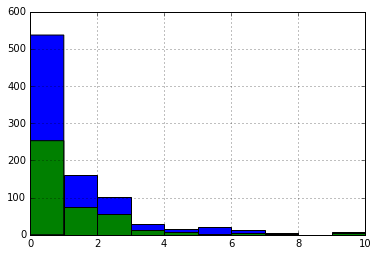

In [38]:
train['FamilySize'].hist()
test['FamilySize'].hist()

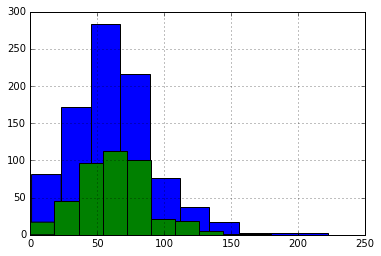

In [39]:
train['Age*Class'].hist()
test['Age*Class'].hist()

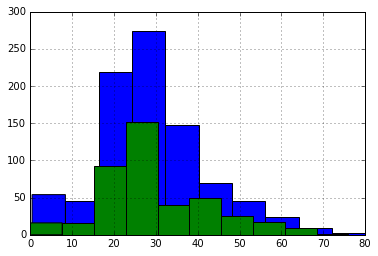

In [40]:
train.AgeFill.hist()
test.AgeFill.hist()

In [41]:
train.dtypes[train.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [42]:
train = train.drop(['Name', 'Fare', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1)
test = test.drop(['Name', 'Fare', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,1,0,1,3,22.0,0,1,66.0
1,2,1,1,1,0,0,1,38.0,0,1,38.0
2,3,1,3,0,0,0,3,26.0,0,0,78.0
3,4,1,1,1,0,0,3,35.0,0,1,35.0
4,5,0,3,0,0,1,3,35.0,0,0,105.0


In [44]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892,3,0,0,1,2,34,0,0,102
1,893,3,1,0,0,3,47,0,1,141
2,894,2,0,0,1,2,62,0,0,124
3,895,3,0,0,1,3,27,0,0,81
4,896,3,1,1,0,3,22,0,2,66


In [45]:
train_data = train.values
train_data

array([[   1. ,    0. ,    3. , ...,    0. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    0. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [46]:
test_data = test.values
test_data

array([[ 892,    3,    0, ...,    0,    0,  102],
       [ 893,    3,    1, ...,    0,    1,  141],
       [ 894,    2,    0, ...,    0,    0,  124],
       ..., 
       [1307,    3,    0, ...,    0,    0,  114],
       [1308,    3,    0, ...,    1,    0,   72],
       [1309,    3,    1, ...,    1,    2,   72]])

In [47]:
forest = RandomForestClassifier(n_estimators = 100)

In [48]:
X_train = train_data[0::,2::]
X_train

array([[  3. ,   1. ,   0. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   0. , ...,   0. ,   1. ,  38. ],
       [  3. ,   0. ,   0. , ...,   0. ,   0. ,  78. ],
       ..., 
       [  3. ,   1. ,   2. , ...,   1. ,   3. ,  64.5],
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,  26. ],
       [  3. ,   0. ,   0. , ...,   0. ,   0. ,  96. ]])

In [49]:
y_train = train_data[0::,1]
y_train

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [50]:
forest = forest.fit(X_train, y_train)

In [51]:
X_test = test_data[0::,1::]
X_test

array([[  3,   0,   0, ...,   0,   0, 102],
       [  3,   1,   0, ...,   0,   1, 141],
       [  2,   0,   0, ...,   0,   0, 124],
       ..., 
       [  3,   0,   0, ...,   0,   0, 114],
       [  3,   0,   0, ...,   1,   0,  72],
       [  3,   1,   1, ...,   1,   2,  72]])

In [52]:
output = forest.predict(X_test).astype(int)
output

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1,

In [53]:
output_df = pd.DataFrame(data= output, columns= ['Survived'])
output_df.head()

,Survived
0,0
1,0
2,0
3,1
4,1


In [54]:
test['Survived'] = output_df['Survived']
test.head()

,PassengerId,Pclass,SibSp,Parch,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class,Survived
0,892,3,0,0,1,2,34,0,0,102,0
1,893,3,1,0,0,3,47,0,1,141,0
2,894,2,0,0,1,2,62,0,0,124,0
3,895,3,0,0,1,3,27,0,0,81,1
4,896,3,1,1,0,3,22,0,2,66,1


In [55]:
prob_output = forest.predict_proba(X_test)
prob_output[0::,1]

array([ 0.        ,  0.04      ,  0.4       ,  0.74513492,  0.54850794,
        0.24427056,  0.34494949,  0.01      ,  0.20666667,  0.21853884,
        0.09948467,  0.10845238,  0.97      ,  0.23      ,  0.97      ,
        0.96      ,  0.05502632,  0.43393609,  0.39      ,  0.1525    ,
        0.36416667,  0.86      ,  0.94690559,  0.41      ,  0.874     ,
        0.02      ,  0.98666667,  0.49428571,  0.23404594,  0.22531944,
        0.04      ,  0.02      ,  0.6525    ,  0.20538889,  0.235     ,
        0.37959524,  0.19882373,  0.7915    ,  0.14216739,  0.09948467,
        0.20366667,  0.45942812,  0.01      ,  1.        ,  0.95      ,
        0.14216739,  0.19197619,  0.08104227,  0.85      ,  0.60116667,
        0.3975    ,  0.17683333,  0.89      ,  0.75      ,  0.40795833,
        0.05      ,  0.        ,  0.14216739,  0.01922449,  0.98      ,
        0.00444444,  0.22447619,  0.21435065,  0.82732614,  0.75      ,
        0.57467208,  0.215     ,  0.        ,  0.25666667,  0.83

In [56]:
test['ProbSurvived'] = prob_output[0::,1]
test.head()

,PassengerId,Pclass,SibSp,Parch,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class,Survived,ProbSurvived
0,892,3,0,0,1,2,34,0,0,102,0,0.000000
1,893,3,1,0,0,3,47,0,1,141,0,0.040000
2,894,2,0,0,1,2,62,0,0,124,0,0.400000
3,895,3,0,0,1,3,27,0,0,81,1,0.745135
4,896,3,1,1,0,3,22,0,2,66,1,0.548508


In [57]:
score = forest.score(X_train, y_train)
score

0.93714927048260377

In [58]:
test[['PassengerId', 'Survived']].to_csv(r'../data/Titanic/test_predict.csv', index= False)

In [66]:
clf = tree.DecisionTreeClassifier(max_depth= 5)

clf = clf.fit(X_train, y_train)

tree.export_graphviz(clf, out_file= 'tree.dot')

In [67]:
clf.score(X_train, y_train)

0.85072951739618408